# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import time
import json

# Import API key
from pprint import pprint
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
# Couter for print log
record_counter = 0
set_counter = 1

# Dash for F string
dash = ("-")*35

# Creating empty list for the 8 different variables 
cloud, country, date, humidity, lat, lng, max_temp, wind_speed = ([] for i in range (8))

# F string to print the beginning of the print log
print(f"{dash}\nBeginning Data Retrieval\n{dash}")

# Forloop to append various values retrieved from openweathermap
for city in cities:

# Start of the print log counter
    record_counter = record_counter + 1

# Append extracted json values to their corresponding lists 
    try:
        response = requests.get(query_url + city).json()
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {record_counter} of Set {set_counter} | {city.title()}")

# If statement to reset counters        
        if record_counter == 50:
            record_counter = 0
            set_counter = set_counter + 1

# Exception Handling for when values do not exist
    except:
        record_counter = record_counter - 1
        cloud.append("NaN")
        country.append("NaN")
        date.append("NaN")
        humidity.append("NaN")
        lat.append("NaN")
        lng.append("NaN")
        max_temp.append("NaN")
        wind_speed.append("NaN")
        print("City not found. Skipping...")

# F string to print the ending of the print log        
print(f"{dash}\nData Retrieval Complete\n{dash}")

-----------------------------------
Beginning Data Retrieval
-----------------------------------
Processing Record 1 of Set 1 | Chokurdakh
City not found. Skipping...
Processing Record 2 of Set 1 | El Alto
Processing Record 3 of Set 1 | Rikitea
Processing Record 4 of Set 1 | Kautokeino
City not found. Skipping...
Processing Record 5 of Set 1 | Zyryanskoye
Processing Record 6 of Set 1 | Solnechnyy
Processing Record 7 of Set 1 | Kodiak
Processing Record 8 of Set 1 | Kedrovyy
Processing Record 9 of Set 1 | Nouakchott
Processing Record 10 of Set 1 | Tasiilaq
Processing Record 11 of Set 1 | Albany
Processing Record 12 of Set 1 | Liverpool
Processing Record 13 of Set 1 | Turukhansk
Processing Record 14 of Set 1 | Hithadhoo
Processing Record 15 of Set 1 | Sisimiut
Processing Record 16 of Set 1 | Fairbanks
Processing Record 17 of Set 1 | Lavrentiya
Processing Record 18 of Set 1 | Provideniya
Processing Record 19 of Set 1 | Busselton
Processing Record 20 of Set 1 | Punta Arenas
Processing Recor

Processing Record 34 of Set 4 | Anjangaon
Processing Record 35 of Set 4 | Constitucion
Processing Record 36 of Set 4 | Plastun
Processing Record 37 of Set 4 | Nanortalik
Processing Record 38 of Set 4 | Cocobeach
Processing Record 39 of Set 4 | Garowe
Processing Record 40 of Set 4 | Fortuna
Processing Record 41 of Set 4 | Ouegoa
Processing Record 42 of Set 4 | Turlock
Processing Record 43 of Set 4 | Bom Jesus
Processing Record 44 of Set 4 | Mount Gambier
Processing Record 45 of Set 4 | Paamiut
Processing Record 46 of Set 4 | Surt
Processing Record 47 of Set 4 | Lata
Processing Record 48 of Set 4 | Arraial Do Cabo
Processing Record 49 of Set 4 | Saint-Francois
Processing Record 50 of Set 4 | Pakxan
Processing Record 1 of Set 5 | Dikson
Processing Record 2 of Set 5 | Ostrovnoy
City not found. Skipping...
Processing Record 3 of Set 5 | La Ronge
Processing Record 4 of Set 5 | Guantanamo
City not found. Skipping...
Processing Record 5 of Set 5 | Faya
Processing Record 6 of Set 5 | Merauke
Ci

Processing Record 21 of Set 8 | Motygino
Processing Record 22 of Set 8 | Naze
Processing Record 23 of Set 8 | Ust-Kulom
Processing Record 24 of Set 8 | Yaan
Processing Record 25 of Set 8 | Mpika
Processing Record 26 of Set 8 | Bagan
Processing Record 27 of Set 8 | Xai-Xai
City not found. Skipping...
Processing Record 28 of Set 8 | Upata
Processing Record 29 of Set 8 | Torgau
Processing Record 30 of Set 8 | Sheridan
Processing Record 31 of Set 8 | Kungurtug
Processing Record 32 of Set 8 | Wanning
Processing Record 33 of Set 8 | Hue
Processing Record 34 of Set 8 | Valparaiso
Processing Record 35 of Set 8 | Mandeville
Processing Record 36 of Set 8 | Plettenberg Bay
Processing Record 37 of Set 8 | Manokwari
Processing Record 38 of Set 8 | Orotukan
Processing Record 39 of Set 8 | Tuatapere
Processing Record 40 of Set 8 | Coihaique
Processing Record 41 of Set 8 | Douentza
Processing Record 42 of Set 8 | Grande Prairie
Processing Record 43 of Set 8 | Entre Rios
Processing Record 44 of Set 8 |

Processing Record 7 of Set 12 | Amapa
Processing Record 8 of Set 12 | Ukiah
Processing Record 9 of Set 12 | Belaya Gora
Processing Record 10 of Set 12 | Praia Da Vitoria
Processing Record 11 of Set 12 | Camargo
Processing Record 12 of Set 12 | Pangkalanbuun
Processing Record 13 of Set 12 | Debre Tabor
City not found. Skipping...
Processing Record 14 of Set 12 | Chernyshevskiy
Processing Record 15 of Set 12 | Shimoda
Processing Record 16 of Set 12 | Beringovskiy
Processing Record 17 of Set 12 | Chipoka
Processing Record 18 of Set 12 | Primo Tapia
Processing Record 19 of Set 12 | Yellapur
City not found. Skipping...
Processing Record 20 of Set 12 | Fallon
Processing Record 21 of Set 12 | Anuradhapura
-----------------------------------
Data Retrieval Complete
-----------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating dataframe from gathered data
weather_df = pd.DataFrame(cities)
weather_df = weather_df.rename(columns={0:"City"})
weather_df["Cloudiness"] = cloud
weather_df["Country"] = country
weather_df["Date"] = date
weather_df["Humidity"] = humidity
weather_df["Lat"] = lat
weather_df["Lng"] = lng
weather_df["Max Temp"] = max_temp
weather_df["Wind Speed"] = wind_speed

# Writing dataframe to csv
weather_df.to_csv("WeatherPy_dataframe.csv")

# Counting each column's value
weather_df.count()

City          632
Cloudiness    632
Country       632
Date          632
Humidity      632
Lat           632
Lng           632
Max Temp      632
Wind Speed    632
dtype: int64

In [6]:
# Displaying the first 5 rows of the dataframe
weather_df.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,chokurdakh,64,RU,1539970436,84,70.62,147.9,14.39,11.12
1,toliary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,el alto,75,BO,1539968400,71,-16.5,-68.19,50,10.29
3,rikitea,8,PF,1539970433,96,-23.12,-134.97,74.96,10.11
4,kautokeino,0,NO,1539971172,91,69.01,23.04,26,2.51


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

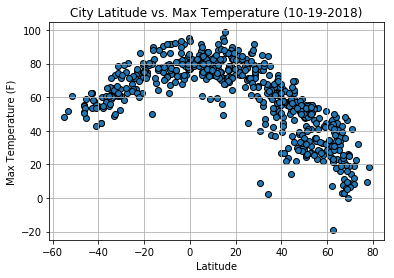

In [7]:
# Extracting today's date
tdate = datetime.datetime.today().strftime('%m-%d-%Y')

# Making a scattered plot for Latitude vs Temp
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolors="black",)

# Creating titles and axis labels
plt.title(f"City Latitude vs. Max Temperature ({tdate})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Saving the plotted figures as .png
plt.savefig("City Latitude VS Max Temp.png")

# Displaying the graph
plt.show()

#### Latitude vs. Humidity Plot

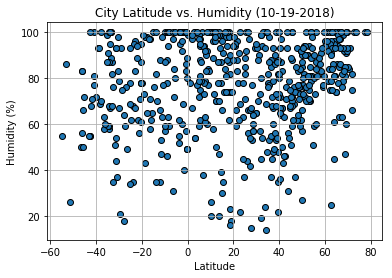

In [8]:
# Making a scattered plot for Latitude vs Temp
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors="black",)

# Creating titles and axis labels
plt.title(f"City Latitude vs. Humidity ({tdate})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Saving the plotted figures as .png
plt.savefig("City Latitude VS Humidity.png")

# Displaying the graph
plt.show()

#### Latitude vs. Cloudiness Plot

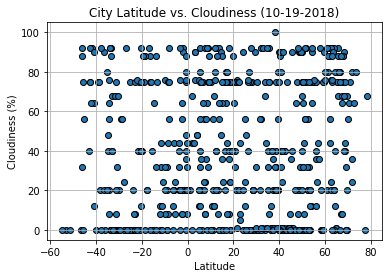

In [9]:
# Making a scattered plot for Latitude vs Temp
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolors="black",)

# Creating titles and axis labels
plt.title(f"City Latitude vs. Cloudiness ({tdate})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Saving the plotted figures as .png
plt.savefig("City Latitude VS Cloudiness.png")

# Displaying the graph
plt.show()

#### Latitude vs. Wind Speed Plot

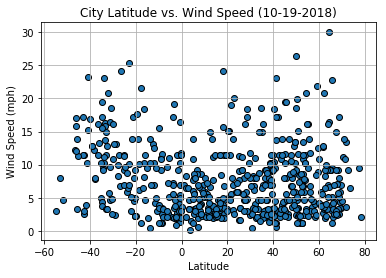

In [10]:
# Making a scattered plot for Latitude vs Temp
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolors="black",)

# Creating titles and axis labels
plt.title(f"City Latitude vs. Wind Speed ({tdate})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Saving the plotted figures as .png
plt.savefig("City Latitude VS Wind Speed.png")

# Displaying the graph
plt.show()